In [10]:
import pandas as pd
from google.colab import drive

In [11]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
file_path = '/content/drive/MyDrive/DATASET/RegresiUTSTelkom.csv'

In [13]:
df = pd.read_csv(file_path, header=None)

In [14]:
print(df.head())

     0         1         2         3         4         5         6         7   \
0  2001  49.94357  21.47114  73.07750   8.74861 -17.40628 -13.09905 -25.01202   
1  2001  48.73215  18.42930  70.32679  12.94636 -10.32437 -24.83777   8.76630   
2  2001  50.95714  31.85602  55.81851  13.41693  -6.57898 -18.54940  -3.27872   
3  2001  48.24750  -1.89837  36.29772   2.58776   0.97170 -26.21683   5.05097   
4  2001  50.97020  42.20998  67.09964   8.46791 -15.85279 -16.81409 -12.48207   

         8         9   ...        81         82        83        84        85  \
0 -12.23257   7.83089  ...  13.01620  -54.40548  58.99367  15.37344   1.11144   
1  -0.92019  18.76548  ...   5.66812  -19.68073  33.04964  42.87836  -9.90378   
2  -2.35035  16.07017  ...   3.03800   26.05866 -50.92779  10.93792  -0.07568   
3 -10.34124   3.55005  ...  34.57337 -171.70734 -16.96705 -46.67617 -12.51516   
4  -9.37636  12.63699  ...   9.92661  -55.95724  64.92712 -17.72522  -1.49237   

         86         87    

In [15]:
columns = ['Year'] + [f'Feature_{i}' for i in range(1, df.shape[1])]
df.columns = columns

In [17]:
# Mengambil 5 baris pertama dataset
df_sample = df.head()

# Informasi dasar dataset
print("Informasi Dataset:")
print(df_sample.info())

# Statistik Deskriptif
print("\nStatistik Deskriptif:")
print(df_sample.describe())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 91 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        5 non-null      int64  
 1   Feature_1   5 non-null      float64
 2   Feature_2   5 non-null      float64
 3   Feature_3   5 non-null      float64
 4   Feature_4   5 non-null      float64
 5   Feature_5   5 non-null      float64
 6   Feature_6   5 non-null      float64
 7   Feature_7   5 non-null      float64
 8   Feature_8   5 non-null      float64
 9   Feature_9   5 non-null      float64
 10  Feature_10  5 non-null      float64
 11  Feature_11  5 non-null      float64
 12  Feature_12  5 non-null      float64
 13  Feature_13  5 non-null      float64
 14  Feature_14  5 non-null      float64
 15  Feature_15  5 non-null      float64
 16  Feature_16  5 non-null      float64
 17  Feature_17  5 non-null      float64
 18  Feature_18  5 non-null      float64
 19  Feature_19  5 

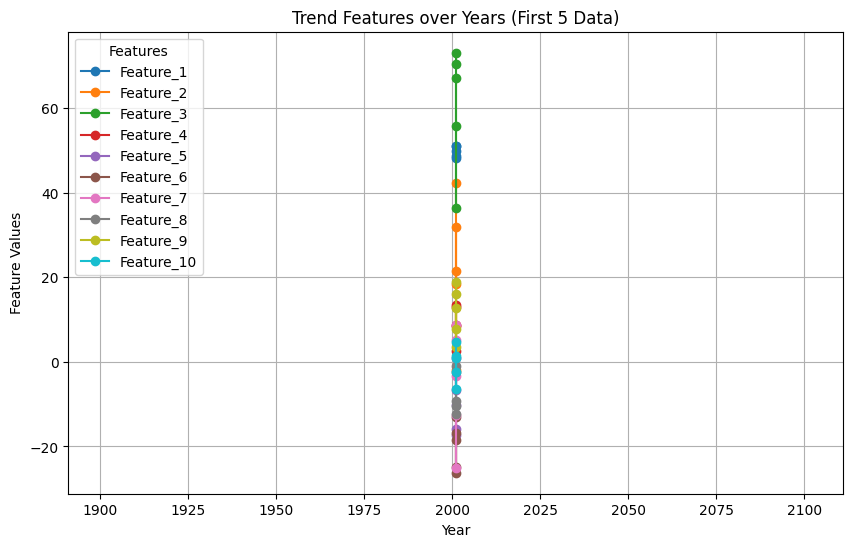

In [19]:
# Import library visualisasi
import matplotlib.pyplot as plt

# Plot data tahun terhadap Feature_1 hingga Feature_5
df_sample.set_index('Year').iloc[:, :10].plot(kind='line', figsize=(10, 6), marker='o')
plt.title("Trend Features over Years (First 5 Data)")
plt.xlabel("Year")
plt.ylabel("Feature Values")
plt.grid()
plt.legend(loc='upper left', title="Features")
plt.show()


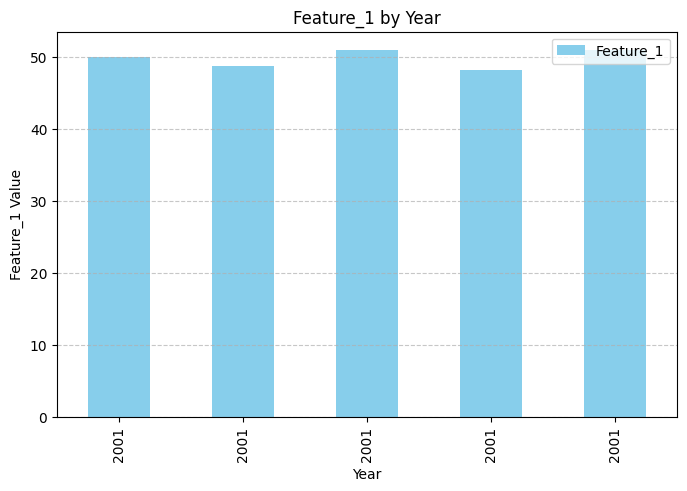

In [20]:
# Bar plot Feature_1 berdasarkan tahun
df_sample.plot(x='Year', y='Feature_1', kind='bar', color='skyblue', figsize=(8, 5))
plt.title("Feature_1 by Year")
plt.xlabel("Year")
plt.ylabel("Feature_1 Value")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


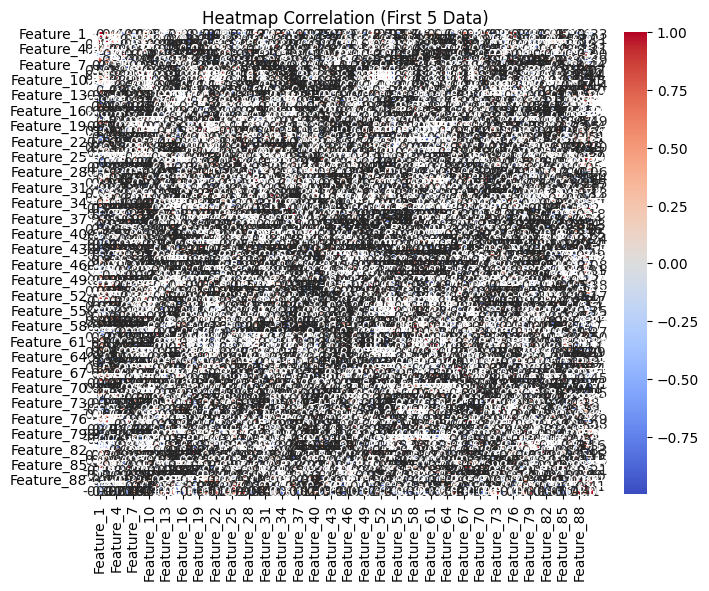

In [21]:
import seaborn as sns

# Membuat heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(df_sample.iloc[:, 1:].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Correlation (First 5 Data)")
plt.show()


In [22]:
# Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


In [23]:
df_sample = df.head()

# Fitur (X) dan Target (y)
X = df_sample.iloc[:, 1:].values  # Semua fitur kecuali kolom 'Year'
y = df_sample['Feature_1'].values  # Misalkan 'Feature_1' sebagai target

In [24]:
# Pipeline untuk Polynomial Regression
poly_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),  # Polynomial transformation
    ('scaler', StandardScaler()),                     # Standardization
    ('regressor', DecisionTreeRegressor(random_state=42))  # Decision Tree sebagai regressor
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train dan evaluasi
poly_pipeline.fit(X_train, y_train)
y_pred_poly = poly_pipeline.predict(X_test)
print("Polynomial Regression MSE:", mean_squared_error(y_test, y_pred_poly))


Polynomial Regression MSE: 0.23488562249999506


In [25]:
# Pipeline untuk Decision Tree Regression
tree_pipeline = Pipeline([
    ('scaler', StandardScaler()),                     # Standardization
    ('regressor', DecisionTreeRegressor(random_state=42))  # Decision Tree sebagai regressor
])

# Train dan evaluasi
tree_pipeline.fit(X_train, y_train)
y_pred_tree = tree_pipeline.predict(X_test)
print("Decision Tree Regression MSE:", mean_squared_error(y_test, y_pred_tree))


Decision Tree Regression MSE: 4.950580500100024


In [26]:
# Pipeline untuk k-NN Regression
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),                     # Standardization
    ('regressor', KNeighborsRegressor(n_neighbors=3))  # k-NN regressor
])

# Train dan evaluasi
knn_pipeline.fit(X_train, y_train)
y_pred_knn = knn_pipeline.predict(X_test)
print("k-NN Regression MSE:", mean_squared_error(y_test, y_pred_knn))


k-NN Regression MSE: 3.5777218101778


In [27]:
# Pipeline untuk XGBoost Regression
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),                     # Standardization
    ('regressor', XGBRegressor(n_estimators=100, random_state=42))  # XGBoost regressor
])

# Train dan evaluasi
xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)
print("XGBoost Regression MSE:", mean_squared_error(y_test, y_pred_xgb))


XGBoost Regression MSE: 0.23376157322371335


In [28]:
print("Comparison of Models:")
print(f"Polynomial Regression MSE: {mean_squared_error(y_test, y_pred_poly)}")
print(f"Decision Tree Regression MSE: {mean_squared_error(y_test, y_pred_tree)}")
print(f"k-NN Regression MSE: {mean_squared_error(y_test, y_pred_knn)}")
print(f"XGBoost Regression MSE: {mean_squared_error(y_test, y_pred_xgb)}")


Comparison of Models:
Polynomial Regression MSE: 0.23488562249999506
Decision Tree Regression MSE: 4.950580500100024
k-NN Regression MSE: 3.5777218101778
XGBoost Regression MSE: 0.23376157322371335


In [29]:
# Import library
from sklearn.model_selection import GridSearchCV


In [30]:
# Definisikan parameter grid untuk PolynomialFeatures dan DecisionTreeRegressor
param_grid_poly = {
    'poly_features__degree': [1, 2, 3],  # Derajat polynomial
    'regressor__max_depth': [2, 3, 5],   # Maksimal kedalaman Decision Tree
    'regressor__min_samples_split': [2, 5],  # Minimal data untuk split
}

# Pipeline untuk Polynomial Regression + Decision Tree
poly_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# GridSearchCV untuk Polynomial Regression
grid_poly = GridSearchCV(estimator=poly_pipeline, param_grid=param_grid_poly, cv=2, scoring='neg_mean_squared_error')
grid_poly.fit(X, y)

# Menampilkan hasil terbaik
print("Best Parameters (Polynomial Regression):", grid_poly.best_params_)
print("Best MSE (Polynomial Regression):", -grid_poly.best_score_)


Best Parameters (Polynomial Regression): {'poly_features__degree': 2, 'regressor__max_depth': 2, 'regressor__min_samples_split': 2}
Best MSE (Polynomial Regression): 0.5370512520166623


In [31]:
# Parameter grid untuk Decision Tree
param_grid_tree = {
    'regressor__max_depth': [2, 3, 5, None],  # Maksimal kedalaman
    'regressor__min_samples_split': [2, 5, 10],  # Minimal data untuk split
}

# Pipeline untuk Decision Tree
tree_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# GridSearchCV untuk Decision Tree Regression
grid_tree = GridSearchCV(estimator=tree_pipeline, param_grid=param_grid_tree, cv=2, scoring='neg_mean_squared_error')
grid_tree.fit(X, y)

# Menampilkan hasil terbaik
print("Best Parameters (Decision Tree):", grid_tree.best_params_)
print("Best MSE (Decision Tree):", -grid_tree.best_score_)


Best Parameters (Decision Tree): {'regressor__max_depth': 2, 'regressor__min_samples_split': 5}
Best MSE (Decision Tree): 1.4125099497833318


In [32]:
# Parameter grid untuk k-NN
param_grid_knn = {
    'regressor__n_neighbors': [2, 3, 5],    # Jumlah tetangga
    'regressor__weights': ['uniform', 'distance'],  # Jenis pembobotan
}

# Pipeline untuk k-NN Regression
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', KNeighborsRegressor())
])

# GridSearchCV untuk k-NN Regression
grid_knn = GridSearchCV(estimator=knn_pipeline, param_grid=param_grid_knn, cv=2, scoring='neg_mean_squared_error')
grid_knn.fit(X, y)

# Menampilkan hasil terbaik
print("Best Parameters (k-NN):", grid_knn.best_params_)
print("Best MSE (k-NN):", -grid_knn.best_score_)


Best Parameters (k-NN): {'regressor__n_neighbors': 2, 'regressor__weights': 'distance'}
Best MSE (k-NN): 2.2769623354003796


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 239, in _get_response_values
    y_pred, pos_label = predic

In [33]:
# Parameter grid untuk XGBoost
param_grid_xgb = {
    'regressor__n_estimators': [50, 100, 200],  # Jumlah pohon
    'regressor__max_depth': [2, 3, 5],         # Kedalaman maksimum
    'regressor__learning_rate': [0.01, 0.1, 0.2],  # Laju pembelajaran
}

# Pipeline untuk XGBoost Regression
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', XGBRegressor(random_state=42))
])

# GridSearchCV untuk XGBoost Regression
grid_xgb = GridSearchCV(estimator=xgb_pipeline, param_grid=param_grid_xgb, cv=2, scoring='neg_mean_squared_error')
grid_xgb.fit(X, y)

# Menampilkan hasil terbaik
print("Best Parameters (XGBoost):", grid_xgb.best_params_)
print("Best MSE (XGBoost):", -grid_xgb.best_score_)


Best Parameters (XGBoost): {'regressor__learning_rate': 0.01, 'regressor__max_depth': 2, 'regressor__n_estimators': 100}
Best MSE (XGBoost): 1.1964823251181924
